# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)# YOUR CODE HERE

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<Double click this Markdown cell to make it editable, and record your answers here.>

The data set that I have chosen is the NYC Airbnb listings data set.

I will be predicting the price of an Airbnb listing, so the label for this machine learning model is price.

This is a supervised learning problem because we are training the model using input features with a known output (price). It is a regression problem, as the goal is to predict a continuous numerical value. Since we are not categorizing the data into groups, this is not a classification problem, and therefore not binary or multi-class.

The features I am using to train the model include room_type, bedrooms, bathrooms, and a numeric representation of amenities based on the number of amenities listed.

This is an important problem because predicting price accurately can provide value to both Airbnb and its users. For hosts, it helps set fair and competitive prices. For Airbnb, it allows the platform to recommend best pricing, improve search results, and ensure consistency across listings.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

Correlation of all numeric columns with price:

price                                           1.000000
accommodates                                    0.519057
bedrooms                                        0.475506
beds                                            0.409236
bathrooms                                       0.331297
amenities_count                                 0.170382
availability_60                                 0.152750
availability_90                                 0.148228
availability_30                                 0.146895
availability_365                                0.123984
maximum_maximum_nights                          0.107901
review_scores_location                          0.096610
maximum_nights_avg_ntm                          0.081589
review_scores_cleanliness                       0.081402
host_total_listings_count                       0.080995
host_listings_count                             0.080995
minimum_maximum_nights                  

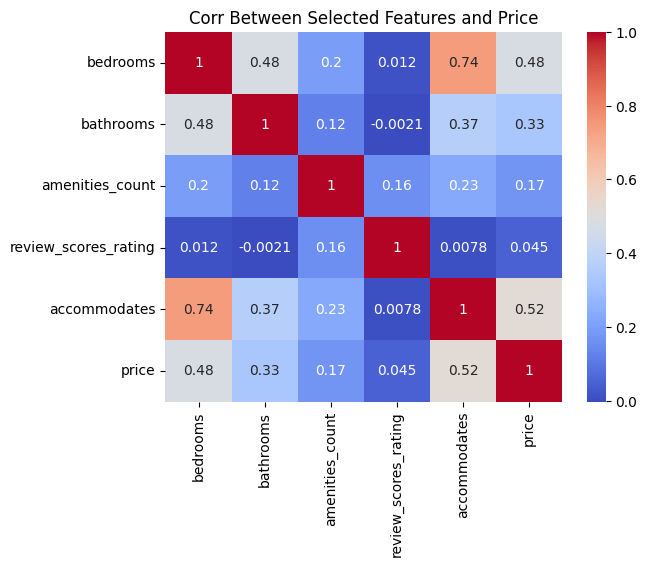

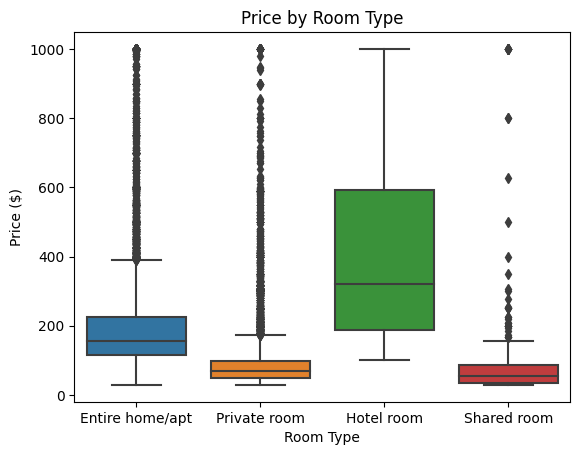

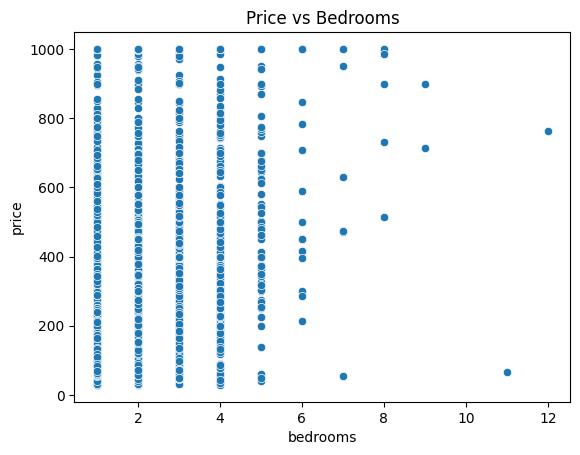

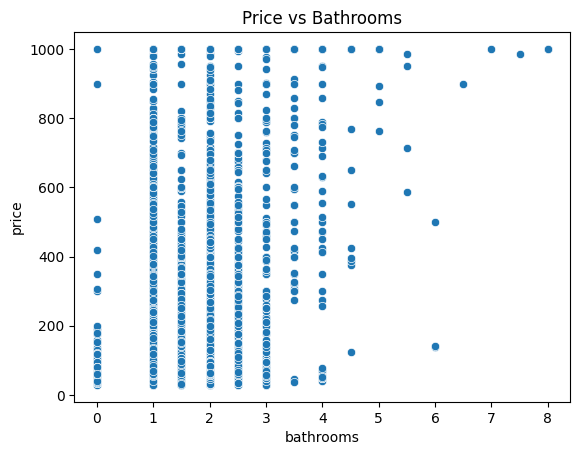

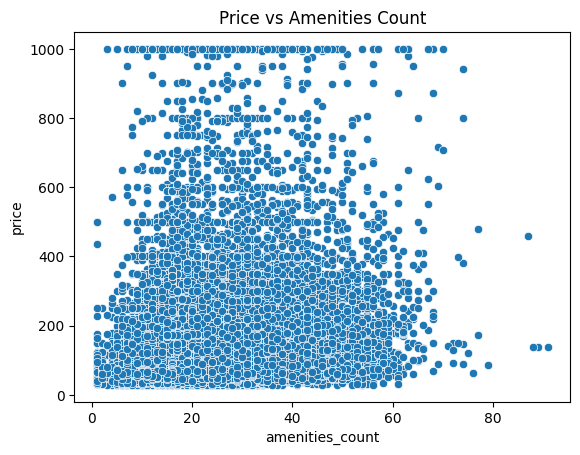

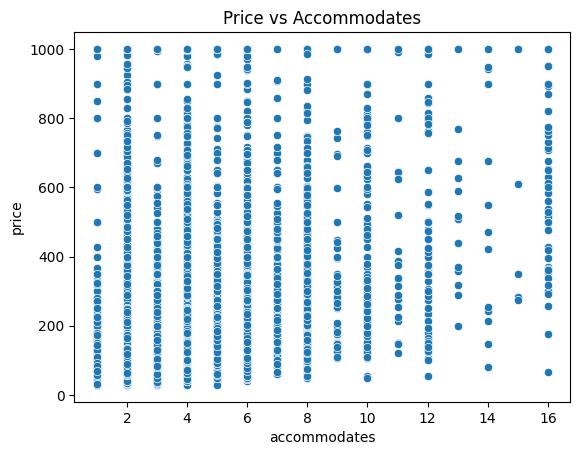

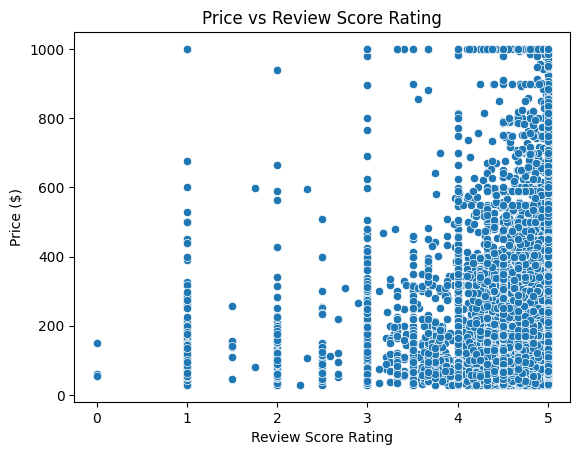

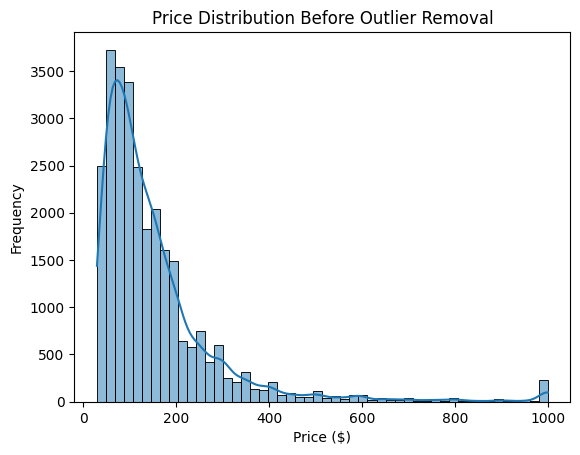

bedrooms                2918
bathrooms                  0
room_type                  0
amenities_count            0
review_scores_rating       0
accommodates               0
price                      0
dtype: int64

In [4]:
# YOUR CODE HERE
df.dtypes
df.columns
df.describe()

df['review_scores_rating'].isnull().sum()


df['amenities_count'] = df['amenities'].apply(lambda x: len(str(x).split(',')))

numeric_df = df.select_dtypes(include=['number'])  # keep only numeric columns
correlations = numeric_df.corr()['price'].sort_values(ascending=False)

print("Correlation of all numeric columns with price:\n")
print(correlations)

features_to_check = ['bedrooms', 'bathrooms','room_type', 'amenities_count','review_scores_rating', 'accommodates', 'price']
corr_matrix = df[features_to_check].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Corr Between Selected Features and Price")
plt.show()

df['room_type'].unique()

#hotel is most expensive
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()

sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title('Price vs Bedrooms')
plt.show()

sns.scatterplot(x='bathrooms', y='price', data=df)
plt.title('Price vs Bathrooms')
plt.show()

sns.scatterplot(x='amenities_count', y='price', data=df)
plt.title('Price vs Amenities Count')
plt.show()

sns.scatterplot(x='accommodates', y='price', data=df)
plt.title('Price vs Accommodates')
plt.show()

#can remove review_scores_rating bc weak corr with price
sns.scatterplot(x='review_scores_rating', y='price', data=df)
plt.title('Price vs Review Score Rating')
plt.xlabel('Review Score Rating')
plt.ylabel('Price ($)')
plt.show()

sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution Before Outlier Removal")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

df[features_to_check].isnull().sum() #bedrooms has 2918 missing values


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

- After inspecting the data, I decided to keep the following features: bedrooms, bathrooms, amenities_count (from the og amenities column), and  an encoding of room_type. I wont include review_scores_rating due to its weak correlation with price. I will also excluded the original amenities and room_type columns after encoding.

- To prepare the data, I will handle missing values by filling them with the median for numerical features. I created new features like amenities_count to simplify the dataset for later. I'll also check for outliers in the price and remove outliers to prevent them from skewing the model.

- I plan to use linear regression as a baseline model. After, I’ll explore random foresting and maybe gradient boosting regressor since they capture non-linear relationships well.

- I’ll start by splitting the data into training and test sets. I’ll first build a baseline model using linear regression just to get a sense of performance. Since the relationship between features and price doesn’t look strongly linear, I’ll move on to more flexible models like random forest regressor. I’ll apply gridSearchCV to tune hyperparameters. I’ll evaluate all models based on mean absolute error and R^2 score, and choose the one with the best generalization on the test set.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [5]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

Model Summary:

Intercept:
alpha =  76.93100247816125

Weights:
w_ 1 =  16.28561726981954  [ weight of  bedrooms ]
w_ 2 =  14.832259094324455  [ weight of  bathrooms ]
w_ 3 =  0.4326037787348689  [ weight of  amenities_count ]
w_ 4 =  13.25537458022228  [ weight of  accommodates ]
w_ 5 =  115.69465959165335  [ weight of  Hotel room ]
w_ 6 =  -58.78746863966822  [ weight of  Private room ]
w_ 7 =  -71.86695830311996  [ weight of  Shared room ]

Model Performance

RMSE =   72.28
 R^2 =   0.35


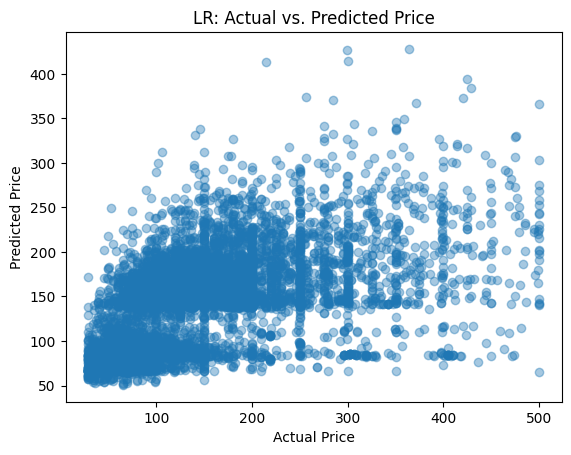

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Random Forest Performance:
RMSE = 70.72
R^2 = 0.38


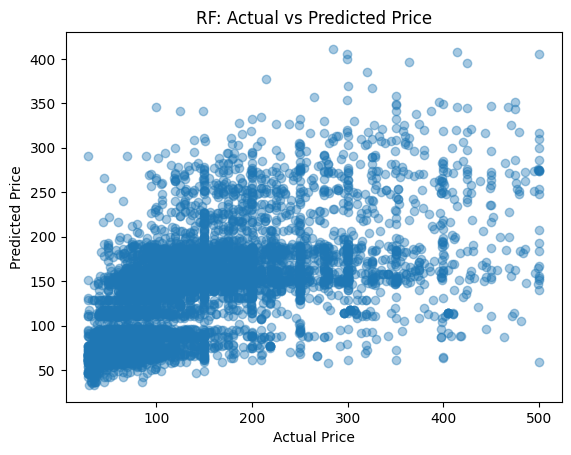

In [6]:
# YOUR CODE HERE
#saw in last cell that bedrooms had nulls so we fill those with the median
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
#we also see that most losting are under 500 so we remove any outliers by creating a sort of range for price
df = df[df['price'] <= 500]

#one hot encoding 
dummies = pd.get_dummies(df['room_type'], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df.drop('room_type', axis=1, inplace=True)
# print(dummies.columns)

df.drop('amenities', axis=1, inplace=True)
#
features = ['bedrooms', 'bathrooms', 'amenities_count', 'accommodates', 'Hotel room', 'Private room', 'Shared room']
X = df[features]
y = df['price']
#print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)
lrprediction = lrmodel.predict(X_test)

print('Model Summary:\n')

# Print intercept (alpha)
print('Intercept:')
print('alpha = ' , lrmodel.intercept_)

# Print weights
print('\nWeights:')
i = 0
for w in lrmodel.coef_:
    print('w_',i+1,'= ', w, ' [ weight of ', features[i],']')
    i += 1

print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, lrprediction)))

print(' R^2 =   %.2f'
      % r2_score(y_test, lrprediction))


#visualizing if this is even good at predicting
plt.scatter(y_test, lrprediction, alpha=0.4)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('LR: Actual vs. Predicted Price')
plt.show()

#now use gridsearch to find best hyperparams for the random forest regessor
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_

#eavulate the random forest
predictionrf = best_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, predictionrf))
r2 = r2_score(y_test, predictionrf)

print("\nRandom Forest Performance:")
print("RMSE = %.2f" % rmse)
print("R^2 = %.2f" % r2)

#visualize predictions 
plt.scatter(y_test, predictionrf, alpha=0.4)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('RF: Actual vs Predicted Price')
plt.show()


To conclude this lab, I started by cleaning and preparing the dataset by filling missing values, simplifying features like amenities_count, and encoding room_type into binary columns.
After filtering out outliers in the price, I trained a baseline Linear Regression model to get a starting point.
The results weren’t great, which made sense since price likely has non-linear relationships with the features.
Next, I moved on to a Random Forest Regressor and used GridSearchCV to tune hyperparameters like n_estimators, max_depth, and min_samples_split.
This gave me a more flexible model that could better handle more complex patterns in the data.
The final Random Forest model had an RMSE of 70.72 and an R² score of 0.38, showing a noticeable improvement in performance.
Looking at the scatterplot of actual vs. predicted prices, the model follows the general price trend, although there’s still spread especially for higher priced listings.
This suggests the model is doing a decent job overall but could be improved further with additional or more detailed features like location.
Overall, based on the evaluation metrics and visual results, I chose the Random Forest model as the best option for predicting Airbnb prices in this dataset.